In [1]:
from util_functs import *
from pathlib import Path
from pydub.playback import play
from IPython.display import Audio
import time
import os
import shutil
from os.path import isdir
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import random
import imageio
import h5py

%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline

np.random.seed(1)

Populating the interactive namespace from numpy and matplotlib


C:\Users\isaaa\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fft', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


We first remove any files that already exist in the clips & melspectrogram directories. Then, we generate our training data X_train, label data y_train and the dataframe containing filename-label pairs, ms_df:

In [2]:
ms_dir = 'input_ms/'
audio_dir = 'input_clips/'
test_ms_dir = 'test_ms/'

for folder in [ms_dir, audio_dir, test_ms_dir]:
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(e)

In [3]:
#Generate the melspecs of size (34,50) & generate 6-second clips, taking a 0.5-second stride when sliding through the 
#audio clip. Also, store a portion of the melspecs away for testing
X_train, y_train, ms_df = generate_data((34,50,4), cl = 6, s = 1, createClips=True, genMelSpecs=True, storeTest=True)

Visualization of one of the images, with it's label, song name and associated audio clip:

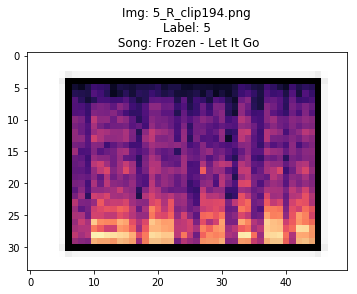

In [4]:
i=27
row = ms_df.iloc[i] #test img
img = imageio.imread(ms_dir + row.fname)
imgplot = plt.imshow(img)
plt.title('Img: {}\nLabel: {}\n Song: {}'.format (row.fname, row.label, LABEL_DICT[row.label]))
plt.show()

In [5]:
#PLay clip associated with above image
filename = audio_dir + (os.path.splitext(row.fname)[0] + '.wav')
clip, sample_rate = librosa.load(filename, sr=None)
Audio(clip, rate=sample_rate)

Save the image and label data to a .h5 file:

In [6]:
hf = h5py.File("data.h5", "w")
hf.create_dataset("train_images", data=X_train)
hf.create_dataset("train_labels", data=y_train)
hf.close()

## References
[1] Fast.ai experimental audio classification module: https://github.com/sevenfx/fastai_audio <br/>
[2] Article for fast.ai audio module: https://towardsdatascience.com/audio-classification-using-fastai-and-on-the-fly-frequency-transforms-4dbe1b540f89 <br/>
[3] A CNN architecture for classifying digits with spectrograms: https://medium.com/x8-the-ai-community/audio-classification-using-cnn-coding-example-f9cbd272269e <br/> https://github.com/Jakobovski/free-spoken-digit-dataset